## New Dataformat - Captury

In [1]:
# load csv

import pandas as pd
import numpy as np

import torch
# load csv
csv_path = '/home/siyuan/research/PoseFall/src/utils/bone_rotations.csv'
df = pd.read_csv(csv_path)
body_joint = df.columns

In [2]:
new_order = [
    # "Spine",
    "LeftUpLeg",
    "RightUpLeg",
    "Spine1",
    "LeftLeg",
    "RightLeg",
    "Spine2",
    "LeftFoot",
    "RightFoot",
    "Spine3",
    "LeftToeBase",
    "RightToeBase",
    "Neck",
    "LeftShoulder",
    "RightShoulder",
    "Head",
    "LeftArm",
    "RightArm",
    "LeftForeArm",
    "RightForeArm",
    "LeftHand",
    "RightHand",
    "LeftHandEE",
    "RightHandEE",
]
SMPL_JOINT_NAMES = [
    # "pelvis",
    "left_hip",
    "right_hip",
    "spine1",
    "left_knee",
    "right_knee",
    "spine2",
    "left_ankle",
    "right_ankle",
    "spine3",
    "left_foot",
    "right_foot",
    "neck",
    "left_collar",
    "right_collar",
    "head",
    "left_shoulder",
    "right_shoulder",
    "left_elbow",
    "right_elbow",
    "left_wrist",
    "right_wrist",
    "left_hand",
    "right_hand",
]

In [3]:
print(len(new_order))
print(len(SMPL_JOINT_NAMES))

23
23


In [19]:
# for idx, (new , ref) in enumerate(zip(new_order, SMPL_JOINT_NAMES)):
#     print(idx, new, ref)

In [20]:
# for each new_order, append _x, _y, _z
new_col = []
for i in new_order:
    new_col.append(i + '_X')
    new_col.append(i + '_Y')
    new_col.append(i + '_Z')
new_col = np.array(new_col, dtype=object)
body_joint = np.array(body_joint)

difference = np.setdiff1d(body_joint, new_col)
redundent = difference[1:]
new_col = np.concatenate(( [difference[0]], new_col, redundent))
df = df[new_col]
# first frame
joint_rot = df.iloc[0,:][1:].values
joint_rot = joint_rot.reshape(-1, 3)
joint_rot = joint_rot[:23, :]
# convert radian to degree
joint_rot = np.rad2deg(joint_rot)
joint_rot = joint_rot.reshape(-1, 3)


In [21]:
for idx, (rot, joint_name) in enumerate(zip(joint_rot, SMPL_JOINT_NAMES)):
    print(f"idx: {idx}, {joint_name}: {rot}")

idx: 0, left_hip: [-87.50849293 -74.00591245  87.57457501]
idx: 1, right_hip: [143.2486832  -65.602116    32.64616638]
idx: 2, spine1: [ 92.97239155 -73.07920604  92.29375078]
idx: 3, left_knee: [ -0.170875     1.36300192 -14.22313299]
idx: 4, right_knee: [-5.41966418 10.20958919 -6.57559387]
idx: 5, spine2: [ 2.75961841  2.32326217 -7.58249865]
idx: 6, left_ankle: [-0.28217619  4.11080698  5.99383934]
idx: 7, right_ankle: [ -3.63916193 171.32944869  75.30605945]
idx: 8, spine3: [   3.39041839 -172.17949305   75.09435774]
idx: 9, left_foot: [ 0.19818874  0.65797085 27.52167694]
idx: 10, right_foot: [  0.38315096   0.10270658 -14.76494629]
idx: 11, neck: [ -0.38027468  -0.20413657 -19.87096348]
idx: 12, left_collar: [  0.57005372  -1.51245671 -26.86868524]
idx: 13, right_collar: [ 90.13584131 -12.23799913  70.69237595]
idx: 14, head: [-101.59489066   11.94526917   68.26939366]
idx: 15, left_shoulder: [ -0.03194142  -3.23351892 -16.44486888]
idx: 16, right_shoulder: [-13.50418301  62.247

In [22]:
print(len(SMPL_JOINT_NAMES))
print(len(joint_rot))

23
23


In [23]:

# joint_rot = np.zeros_like(joint_rot)
# print(joint_rot.shape)
# degree = -90
# # invert y
# # invert z
# blender_elbow = [0, degree,0]

# smplx_elbow = [blender_elbow[0], -blender_elbow[1], -blender_elbow[2]]
# smplx_elbow = np.deg2rad(smplx_elbow)
# # left elbow
# joint_rot[8, :] = smplx_elbow

# inverse y and z axis
# joint_rot[:, 1] = -joint_rot[:, 1]
# joint_rot[:, 2] = -joint_rot[:, 2]
joint_rot=torch.tensor(joint_rot).reshape(1, -1)
joint_rot = joint_rot.float()

joint_rot: torch.Size([1, 69])
model faces: (13776, 3)
vertices: (6890, 3)
plotting joints: (1, 45, 3)


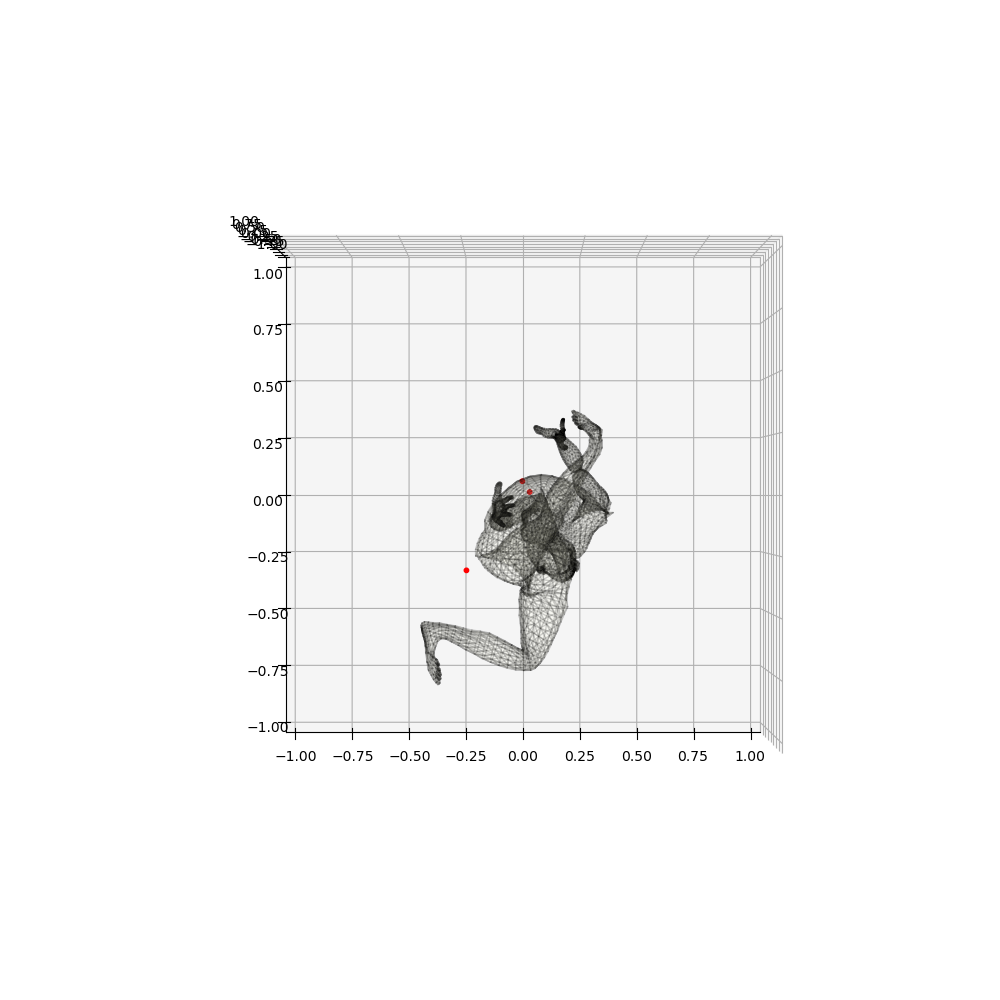

In [24]:
%matplotlib widget
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from pathlib import Path
import smplx, torch


VIZ_OUTPUT = '/home/siyuan/research/PoseFall/src/visulization/viz_output'
VIZ_OUTPUT = Path(VIZ_OUTPUT)

if not VIZ_OUTPUT.is_dir():
    VIZ_OUTPUT.mkdir()

# from smplx.joint_names import  JOINT_NAMES, SMPL_JOINT_NAMES 
model_folder= '/home/siyuan/research/PoseFall/data/SMPL_cleaned'
male_model = "/home/siyuan/research/PoseFall/data/SMPL_cleaned/SMPL_MALE.pkl"

human_model = smplx.SMPL(
    model_path = model_folder,
    create_body_pose=True,
    body_pose= None,
    create_betas=True,
    betas=None,
    gender='male',
)
print(f'joint_rot: {joint_rot.shape}')
output = human_model(body_pose=joint_rot, return_verts=True, return_full_pose=True)
vertices = output.vertices.detach().cpu().numpy()[0]
joints = output.joints.detach().cpu().numpy()
print(f'model faces: {human_model.faces.shape}')
print(f'vertices: {vertices.shape}')

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=90., azim=-90., roll = 0)

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
mesh = Poly3DCollection(vertices[human_model.faces], alpha=0.1)
face_color = (1.0, 1.0, 0.9)
edge_color = (0, 0, 0)
mesh.set_edgecolor(edge_color)
mesh.set_facecolor(face_color)
ax.add_collection3d(mesh)
# ax.scatter(joints[:, 0], joints[:, 1], joints[:, 2], color='r')
joints = joints[:24, :]
print(f'plotting joints: {joints.shape}')
ax.scatter(joints[:, 0], joints[:, 1], joints[:, 2], alpha=1, marker='o', color='r', s=10)
# plt.savefig(output_file, dpi=200)



# get all bones's rotation
mocap=bpy.context.scene.objects['Siyuan:Hips']
for bone in mocap.pose.bones:
    local_rot_mat = convert_global_rot_to_local_rot(bone)
    euler_rotation = local_rot_mat.to_euler('XYZ')
    print(bone.name, np.round(np.rad2deg(euler_rotation), 3))

# set all bones's rotation to zero
mocap=bpy.context.scene.objects['Siyuan:Hips']
for bone in mocap.pose.bones:
    bone.rotation_mode = 'XYZ'
    bone.rotation_euler = (0,0,0)
